1)

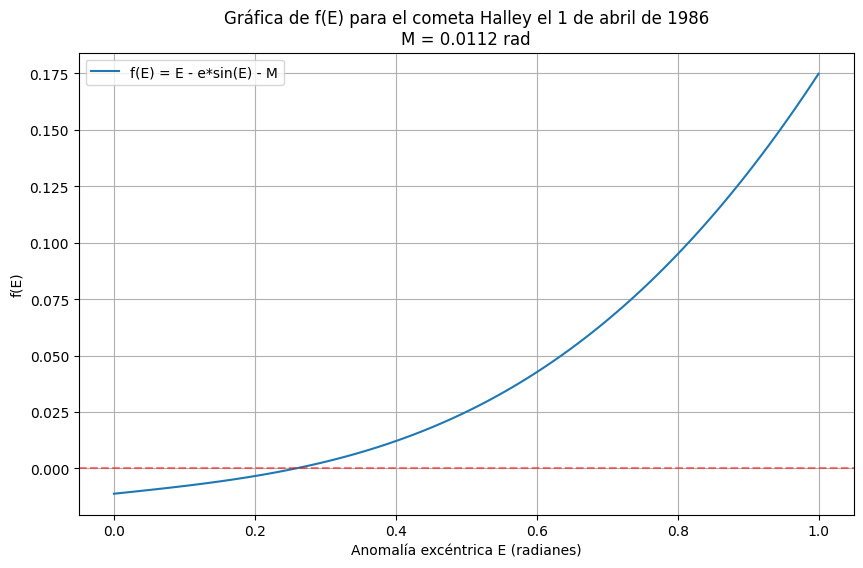

Solución para el 1 de abril de 1986 (Newton):
Anomalía excéntrica E = 0.257770 radianes
Solución para el 1 de abril de 1986 (Secante):
Anomalía excéntrica E = 0.257770 radianes


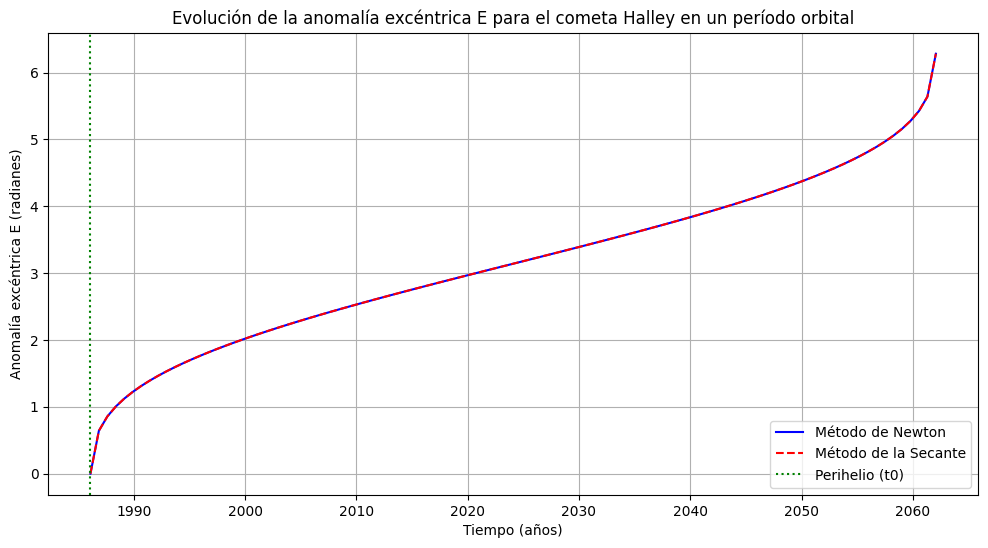

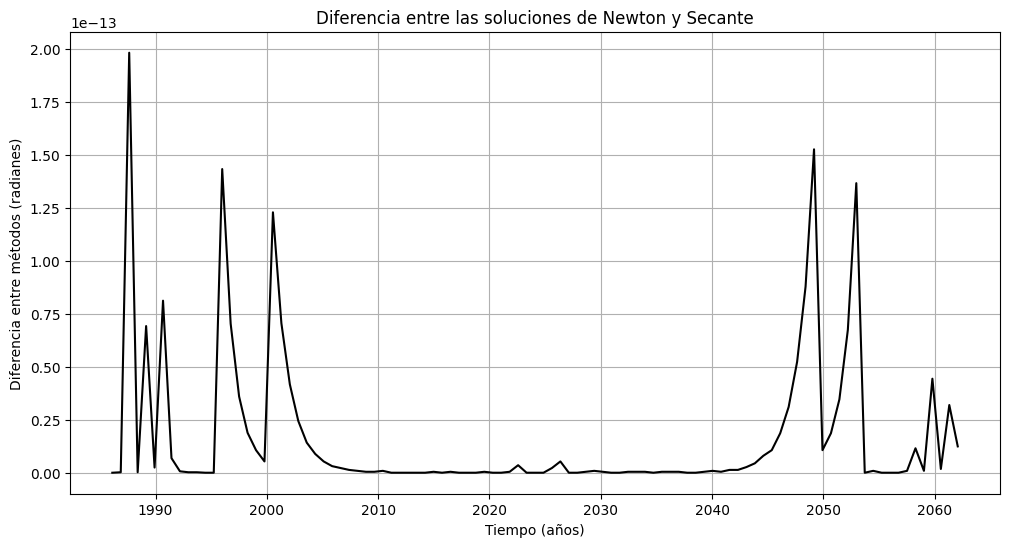

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

# parametricacion
e = 0.9672671  # Excentricidad
T = 75.96000   # periodo orbital en años
t0 = 1986.1113 # fecha de paso por el perihelio (9 de febrero de 1986)

# 1) Solución para el 1 de abril de 1986

def fecha_a_anio(fecha):
    """Convierte una fecha en formato (año, mes, día) a año fraccional"""
    año, mes, día = fecha
    # días en cada mes (no consideramos años bisiestos para simplificar)
    dias_por_mes = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    dia_del_año = sum(dias_por_mes[:mes-1]) + día - 1
    return año + dia_del_año / 365.0

# fecha de interés: 1 de abril de 1986
t_target = fecha_a_anio((1986, 4, 1))

# calculamos la anomalía media M
M_target = 2 * np.pi * (t_target - t0) / T

# función de Kepler
def f(E, M, e):
    return E - e * np.sin(E) - M

# graficamos f(E) para E en [0, 1]
E_values = np.linspace(0, 1, 100)
f_values = f(E_values, M_target, e)

plt.figure(figsize=(10, 6))
plt.plot(E_values, f_values, label='f(E) = E - e*sin(E) - M')
plt.axhline(0, color='red', linestyle='--', alpha=0.5)
plt.xlabel('Anomalía excéntrica E (radianes)')
plt.ylabel('f(E)')
plt.title(f'Gráfica de f(E) para el cometa Halley el 1 de abril de 1986\nM = {M_target:.4f} rad')
plt.grid(True)
plt.legend()
plt.show()

# Resolvemos la ecuación de Kepler para esta fecha usando el método de Newton
E_solution_newton = newton(f, 0.5, args=(M_target, e))
print(f"Solución para el 1 de abril de 1986 (Newton):")
print(f"Anomalía excéntrica E = {E_solution_newton:.6f} radianes")

# Resolvemos con el método de la secante (usando la implementación de SciPy)
E_solution_secant = newton(f, 0.5, x1=0.6, args=(M_target, e))
print(f"Solución para el 1 de abril de 1986 (Secante):")
print(f"Anomalía excéntrica E = {E_solution_secant:.6f} radianes")

# 2) Solución para todo un período orbital

# Definimos los tiempos para un período completo
num_points = 100
delta_t = T / num_points
times = np.array([t0 + i * delta_t for i in range(num_points + 1)])

# Calculamos las anomalías medias para cada tiempo
M_values = 2 * np.pi * (times - t0) / T

# Resolvemos para cada tiempo con Newton y Secante
E_solutions_newton = np.zeros_like(M_values)
E_solutions_secant = np.zeros_like(M_values)
E_guess_newton = 0.5
E_guess_secant1 = 0.5
E_guess_secant2 = 0.6  # Segundo punto inicial para el método de la secante

for i, M in enumerate(M_values):
    # método de Newton
    E_solutions_newton[i] = newton(f, E_guess_newton, args=(M, e))
    E_guess_newton = E_solutions_newton[i]

    # método de la secante (usando la implementación de SciPy)
    E_solutions_secant[i] = newton(f, E_guess_secant1, x1=E_guess_secant2, args=(M, e))
    E_guess_secant1, E_guess_secant2 = E_solutions_secant[i], E_guess_secant1

# Graficamos las soluciones
plt.figure(figsize=(12, 6))
plt.plot(times, E_solutions_newton, 'b-', label='Método de Newton')
plt.plot(times, E_solutions_secant, 'r--', label='Método de la Secante')
plt.xlabel('Tiempo (años)')
plt.ylabel('Anomalía excéntrica E (radianes)')
plt.title('Evolución de la anomalía excéntrica E para el cometa Halley en un período orbital')
plt.axvline(t0, color='green', linestyle=':', label='Perihelio (t0)')
plt.grid(True)
plt.legend()
plt.show()

# Comparamos ambos métodos
plt.figure(figsize=(12, 6))
plt.plot(times, np.abs(E_solutions_newton - E_solutions_secant), 'k-')
plt.xlabel('Tiempo (años)')
plt.ylabel('Diferencia entre métodos (radianes)')
plt.title('Diferencia entre las soluciones de Newton y Secante')
plt.grid(True)
plt.show()

2)

Método Newton-Raphson: m = 0.9575
Método de la Secante: m = 0.9575
Método de Punto Fijo: m = 0.9575


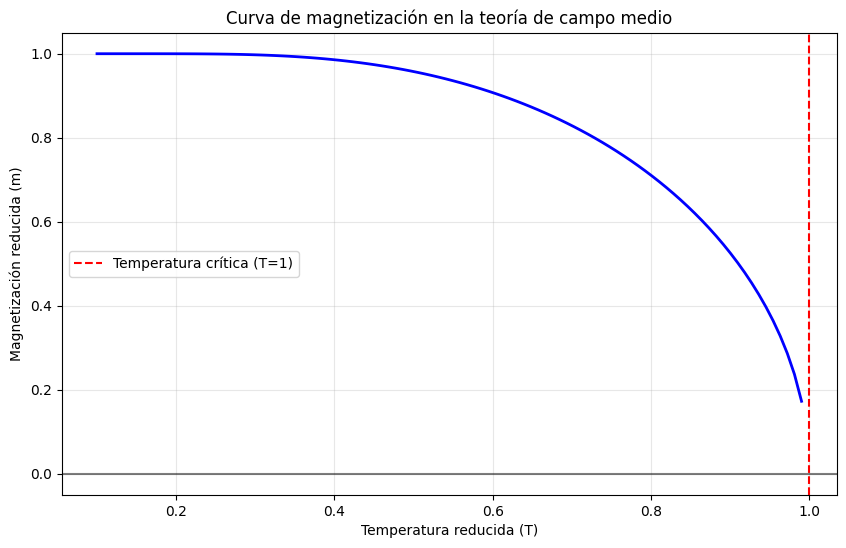

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

## 1)  para T = 0.5

def ecuacion_magnetizacion(m, T):
    """Ecuación de campo medio: m - tanh(m/T) = 0"""
    return m - np.tanh(m/T)

# parámetro dado
T_05 = 0.5

### 1.1) Método de Newton-Raphson
m_newton = newton(ecuacion_magnetizacion, 0.8, args=(T_05,))
print(f"Método Newton-Raphson: m = {m_newton:.4f}")

### 1.2) método de la Secante
m_secante = newton(ecuacion_magnetizacion, 0.7, x1=0.8, args=(T_05,))
print(f"Método de la Secante: m = {m_secante:.4f}")

### 1.3) validación con método de punto fijo
def punto_fijo(T, m0=0.8, tol=1e-10, max_iter=1000):
    """Método de punto fijo para resolver m = tanh(m/T)"""
    m = m0
    for i in range(max_iter):
        m_new = np.tanh(m/T)
        if np.abs(m_new - m) < tol:
            return m_new
        m = m_new
    return m

m_pf = punto_fijo(T_05)
print(f"Método de Punto Fijo: m = {m_pf:.4f}")

## 2) Solución para un rango de temperaturas

T_values = np.linspace(0.1, 0.99, 100)
m_values = np.zeros_like(T_values)

# Usamos el método de la secante para cada temperatura
m_guess = 0.9  # Valor inicial de prueba

for i, T in enumerate(T_values):
    try:
        # usamos la solución anterior como guess inicial para mejor convergencia
        m_values[i] = newton(ecuacion_magnetizacion, m_guess, x1=m_guess*0.9, args=(T,))
        m_guess = m_values[i]  # actualizamos el guess para la siguiente iteración
    except RuntimeError:
        # en caso de no convergencia, probamos con otro guess
        m_values[i] = newton(ecuacion_magnetizacion, 0.5, x1=0.6, args=(T,))
        m_guess = m_values[i]

# Graficamos los resultados
plt.figure(figsize=(10, 6))
plt.plot(T_values, m_values, 'b-', linewidth=2)
plt.xlabel('Temperatura reducida (T)')
plt.ylabel('Magnetización reducida (m)')
plt.title('Curva de magnetización en la teoría de campo medio')
plt.grid(True, alpha=0.3)
plt.axvline(x=1.0, color='r', linestyle='--', label='Temperatura crítica (T=1)')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.5)
plt.legend()
plt.show()

3)

In [8]:
import numpy as np
from scipy.optimize import newton

# Constantes
R = 8.314  # J/(K·mol)
T0 = 4.444  # K
G_target = -1e5  # J

# Definimos la función f(T) = G(T) - G_target = 0
def f(T):
    return -R * T * (5/2) * np.log(T/T0) - G_target

# Definimos la derivada de la función
def df(T):
    return -R * (5/2) * (np.log(T/T0) + 1)

# Configuración del método de Newton
T_guess = 300  # Estimación inicial razonable en Kelvin
tol = 1e-8     # Tolerancia para la convergencia

# Llamamos a la función newton de SciPy
T_solution = newton(func=f, x0=T_guess, fprime=df, tol=tol)

# Mostramos resultados
print(f"Solución usando el metodo de newton:")
print(f"Temperatura T donde G = -1e5 J: {T_solution:.4f} K")

# verificacion:
G_calculado = -R * T_solution * (5/2) * np.log(T_solution/T0)
print(f"Valor de G(T) calculado: {G_calculado:.2f} J")
print(f"Diferencia con el objetivo: {abs(G_calculado - G_target):.2e} J")

Solución usando el metodo de newton:
Temperatura T donde G = -1e5 J: 904.9743 K
Valor de G(T) calculado: -100000.00 J
Diferencia con el objetivo: 0.00e+00 J


4)

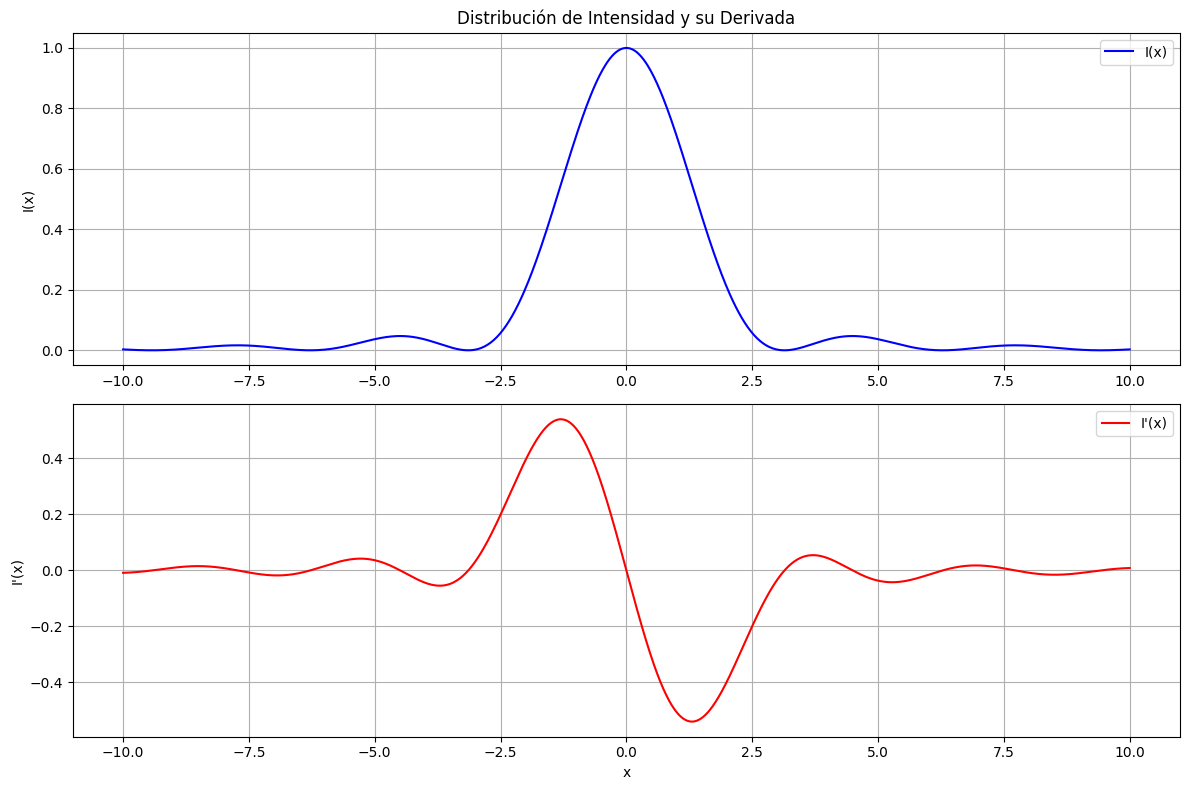

No se pudo encontrar la solución con x0=π, intentando con otro valor inicial
El valor de x donde I(x) = I0/2 es: 1.391557

Máximos locales encontrados en:
x_1 = -7.725252, I(x_1) = 0.016480
x_2 = -4.493410, I(x_2) = 0.047190
x_3 = 0.000000, I(x_3) = 1.000000
x_4 = 0.000000, I(x_4) = 1.000000
x_5 = 4.493410, I(x_5) = 0.047190
x_6 = 7.725252, I(x_6) = 0.016480


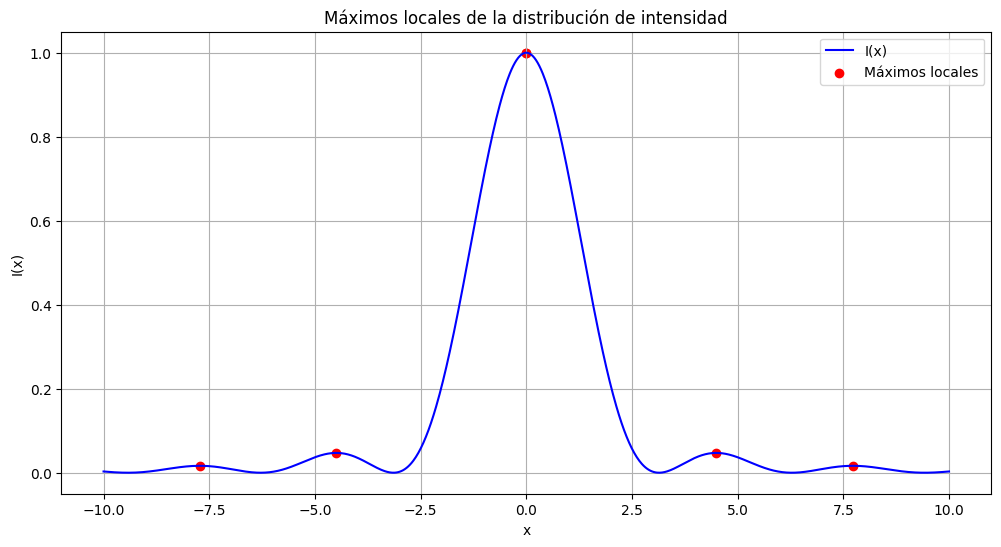

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, bisect

# 1. definición de las funciones I(x) y I'(x)
def I(x):
    return I0 * (np.sinc(x/np.pi))**2  # np.sinc(x) = sin(πx)/(πx)

def I_prime(x):
    if x == 0:
        return 0
    return 2 * I0 * (np.cos(x) - np.sinc(x/np.pi)) * (np.sinc(x/np.pi)/x)

I0 = 1.0  # Intensidad normalizada

# 2. graficar I(x) y I'(x) en [-10, 10]
x_vals = np.linspace(-10, 10, 1000)
I_vals = I(x_vals)
I_prime_vals = np.array([I_prime(x) for x in x_vals])

plt.figure(figsize=(12, 8))

# Gráfico de I(x)
plt.subplot(2, 1, 1)
plt.plot(x_vals, I_vals, 'b-', label='I(x)')
plt.title('Distribución de Intensidad y su Derivada')
plt.ylabel('I(x)')
plt.grid(True)
plt.legend()

# Gráfico de I'(x)
plt.subplot(2, 1, 2)
plt.plot(x_vals, I_prime_vals, 'r-', label="I'(x)")
plt.xlabel('x')
plt.ylabel("I'(x)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# 3. Encontrar x1/2 donde I(x) = I0/2 usando método de la secante
def equation_for_half(x):
    return I(x) - I0/2

# Usamos el método de Newton
try:
    x_half = newton(equation_for_half, np.pi, tol=1e-6)
    print(f"El valor de x donde I(x) = I0/2 es: {x_half:.6f}")
except RuntimeError:
    print("No se pudo encontrar la solución con x0=π, intentando con otro valor inicial")
    x_half = newton(equation_for_half, 1.0, tol=1e-6)
    print(f"El valor de x donde I(x) = I0/2 es: {x_half:.6f}")

# 4. Encontrar máximos locales resolviendo I'(x)=0
def find_maxima(f_prime, a, b, h=0.5, tol=1e-6):
    maxima = []
    x = a
    n_iter_max = 1000  # Para evitar bucles infinitos

    while x < b:
        # Buscamos cambio de signo en la derivada
        if f_prime(x) * f_prime(x + h) <= 0:
            # Aplicamos regula falsi (falsa posición)
            a_temp, b_temp = x, x + h
            for _ in range(n_iter_max):
                fa = f_prime(a_temp)
                fb = f_prime(b_temp)
                c = a_temp - fa * (b_temp - a_temp) / (fb - fa)
                fc = f_prime(c)

                if abs(fc) < tol:
                    # Verificamos que sea un máximo (segunda derivada negativa)
                    # Aproximamos la segunda derivada numéricamente
                    h_num = 1e-5
                    fpc = (f_prime(c + h_num) - f_prime(c - h_num)) / (2 * h_num)
                    if fpc < 0:  # Es un máximo
                        maxima.append(c)
                    break

                if fc * fa < 0:
                    b_temp = c
                else:
                    a_temp = c
            else:
                print(f"No convergió en el intervalo [{x}, {x+h}]")
        x += h

    return maxima

# Encontramos todos los máximos en [-10, 10]
maxima_x = find_maxima(I_prime, -10, 10, h=0.5)

print("\nMáximos locales encontrados en:")
for i, x in enumerate(maxima_x, 1):
    print(f"x_{i} = {x:.6f}, I(x_{i}) = {I(x):.6f}")

# Graficamos los máximos encontrados
plt.figure(figsize=(12, 6))
plt.plot(x_vals, I_vals, 'b-', label='I(x)')
plt.scatter(maxima_x, I(np.array(maxima_x)), color='red', label='Máximos locales')
plt.xlabel('x')
plt.ylabel('I(x)')
plt.title('Máximos locales de la distribución de intensidad')
plt.grid(True)
plt.legend()
plt.show()

5)

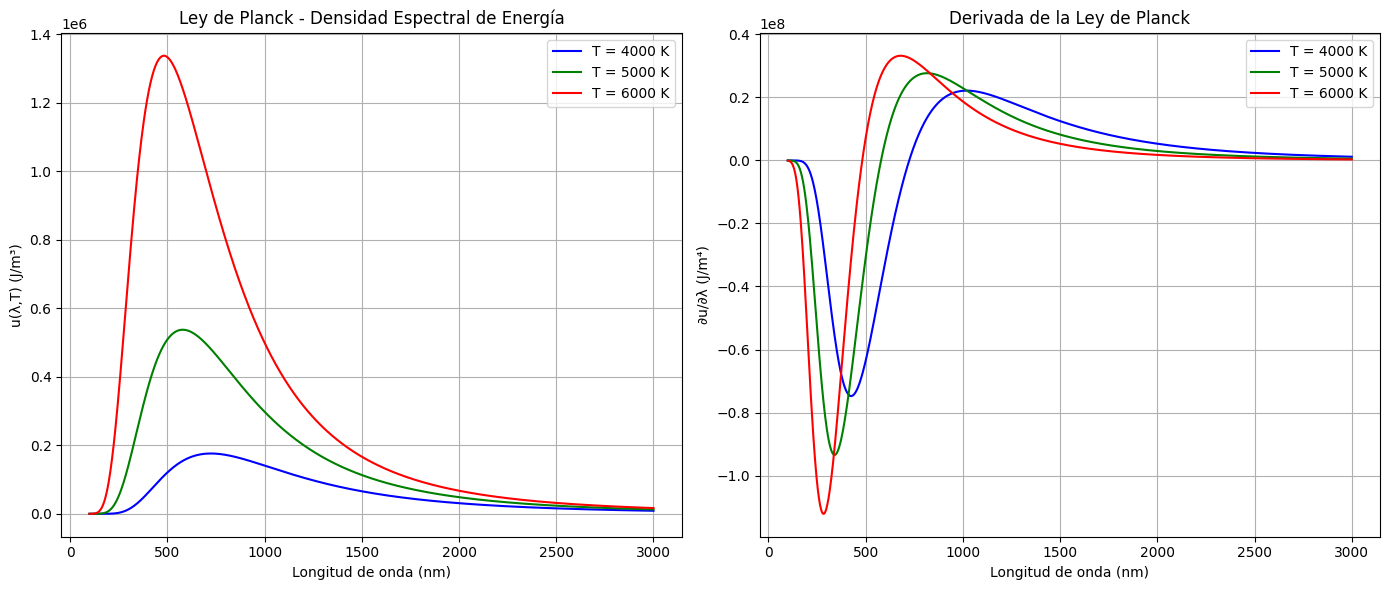


Resultados para T = 5778 K:
Método de Bisección: λ_max = 501.40 nm
Método de Newton: λ_max = 501.40 nm
T = 3000 K: λ_max = 965.69 nm, λ_max·T = 2.8971 mm·K
T = 4000 K: λ_max = 724.27 nm, λ_max·T = 2.8971 mm·K
T = 5000 K: λ_max = 579.42 nm, λ_max·T = 2.8971 mm·K
T = 6000 K: λ_max = 482.85 nm, λ_max·T = 2.8971 mm·K
T = 7000 K: λ_max = 413.87 nm, λ_max·T = 2.8971 mm·K
T = 8000 K: λ_max = 362.13 nm, λ_max·T = 2.8971 mm·K
T = 9000 K: λ_max = 321.90 nm, λ_max·T = 2.8971 mm·K
T = 10000 K: λ_max = 289.71 nm, λ_max·T = 2.8971 mm·K

Constante de Wien calculada: 0.002897 m·K
Constante de Wien teórica: 2.8977719e-3 m·K
Diferencia: 6.94e-07 m·K


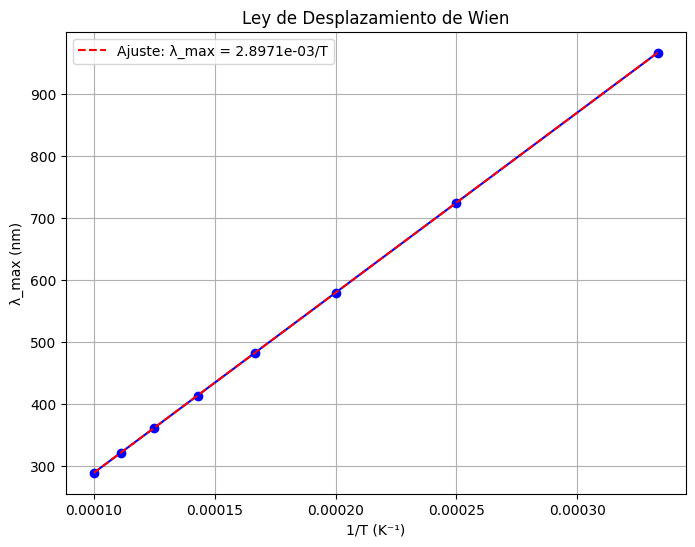

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, bisect

# Constante
h = 6.626e-34       # Constante de Planck (J·s)
kB = 1.381e-23      # Constante de Boltzmann (J/K)
c = 2.998e8         # Velocidad de la luz (m/s)

# definición de funciones adimensionales
def u(x, T):
    """Densidad espectral de energía adimensional"""
    lambda0 = h*c/(kB*T)
    K = 8*np.pi*kB*T/(lambda0**4)
    return K * 1/(x**5 * (np.exp(1/x) - 1))

def du_dx(x):
    """Derivada de u respecto a x (adimensional)"""
    numerator = 5*x + (1 - 5*x)*np.exp(1/x)
    denominator = x**7 * (np.exp(1/x) - 1)**2
    return numerator / denominator

# 1. Graficar para T=4000, 5000, 6000 K
def plot_planck_law():
    temperatures = [4000, 5000, 6000]  # Temperaturas en Kelvin
    colors = ['b', 'g', 'r']

    plt.figure(figsize=(14, 6))

    # Rango de longitudes de onda en nanómetros (visible + cercano IR/UV)
    wavelengths_nm = np.linspace(100, 3000, 1000)  # de 100 nm a 3000 nm
    wavelengths_m = wavelengths_nm * 1e-9  # Convertir a metros

    # Gráfico de u(λ,T)
    plt.subplot(1, 2, 1)
    for T, color in zip(temperatures, colors):
        # Calcular lambda0 para esta temperatura
        lambda0 = h*c/(kB*T)
        x = wavelengths_m / lambda0
        spectral_radiance = u(x, T)

        plt.plot(wavelengths_nm, spectral_radiance, color,
                label=f'T = {T} K')

    plt.title('Ley de Planck - Densidad Espectral de Energía')
    plt.xlabel('Longitud de onda (nm)')
    plt.ylabel('u(λ,T) (J/m³)')
    plt.grid(True)
    plt.legend()

    # Gráfico de ∂u/∂λ
    plt.subplot(1, 2, 2)
    for T, color in zip(temperatures, colors):
        lambda0 = h*c/(kB*T)
        x = wavelengths_m / lambda0
        derivative = du_dx(x) * (-1/lambda0)  # Chain rule: du/dλ = (du/dx)(dx/dλ)

        plt.plot(wavelengths_nm, derivative, color,
                label=f'T = {T} K')

    plt.title('Derivada de la Ley de Planck')
    plt.xlabel('Longitud de onda (nm)')
    plt.ylabel('∂u/∂λ (J/m⁴)')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_planck_law()

# 2. Resolver ∂u/∂λ=0 para T=5778 K (temperatura del Sol)
def find_wien_displacement(T):
    """Encuentra el máximo usando métodos numéricos"""
    lambda0 = h*c/(kB*T)

    # Definir función para encontrar el máximo (du/dλ = 0)
    def equation(x):
        return du_dx(x)

    # Método de Bisección - necesitamos un intervalo que contenga la raíz
    # Sabemos que el máximo está alrededor de x ≈ 0.2 (por Wien's law)
    x_bisect = bisect(equation, 0.1, 0.3, rtol=1e-6)
    lambda_max_bisect = x_bisect * lambda0

    # Método de Newton
    x_newton = newton(equation, 0.2, tol=1e-6)
    lambda_max_newton = x_newton * lambda0

    return lambda_max_bisect, lambda_max_newton

T_sun = 5778  # Temperatura superficial del Sol
lambda_bisect, lambda_newton = find_wien_displacement(T_sun)

print("\nResultados para T = 5778 K:")
print(f"Método de Bisección: λ_max = {lambda_bisect*1e9:.2f} nm")
print(f"Método de Newton: λ_max = {lambda_newton*1e9:.2f} nm")

# 3. validar la ley de desplazamiento de Wien
def validate_wien_law():
    temperatures = np.linspace(3000, 10000, 8)  # Rango de temperaturas
    lambda_max_values = []

    for T in temperatures:
        # Usamos Newton para mayor precisión
        lambda0 = h*c/(kB*T)
        x_max = newton(du_dx, 0.2, tol=1e-8)
        lambda_max = x_max * lambda0
        lambda_max_values.append(lambda_max)

        print(f"T = {T:.0f} K: λ_max = {lambda_max*1e9:.2f} nm, λ_max·T = {lambda_max*T*1e3:.4f} mm·K")

    # calcular la constante de Wien promedio
    wien_constants = [lm*T for lm, T in zip(lambda_max_values, temperatures)]
    avg_wien_constant = np.mean(wien_constants)

    print(f"\nConstante de Wien calculada: {avg_wien_constant:.6f} m·K")
    print(f"Constante de Wien teórica: 2.8977719e-3 m·K")
    print(f"Diferencia: {abs(avg_wien_constant - 2.8977719e-3):.2e} m·K")

    # Gráfico de λ_max vs 1/T
    plt.figure(figsize=(8, 6))
    plt.plot(1/np.array(temperatures), [lm*1e9 for lm in lambda_max_values], 'bo-')
    plt.xlabel('1/T (K⁻¹)')
    plt.ylabel('λ_max (nm)')
    plt.title('Ley de Desplazamiento de Wien')
    plt.grid(True)

    # Regresión lineal
    coeffs = np.polyfit(1/np.array(temperatures), np.array(lambda_max_values), 1)
    linear_fit = np.poly1d(coeffs)
    plt.plot(1/np.array(temperatures), linear_fit(1/np.array(temperatures))*1e9, 'r--',
             label=f'Ajuste: λ_max = {coeffs[0]:.4e}/T')

    plt.legend()
    plt.show()

validate_wien_law()

6)

Estimación de los primeros 6 niveles de energía (eV):
Nivel 0: 0.317 eV
Nivel 1: 0.365 eV
Nivel 2: 0.367 eV
Nivel 3: 1.270 eV
Nivel 4: 2.851 eV
Nivel 5: 3.364 eV


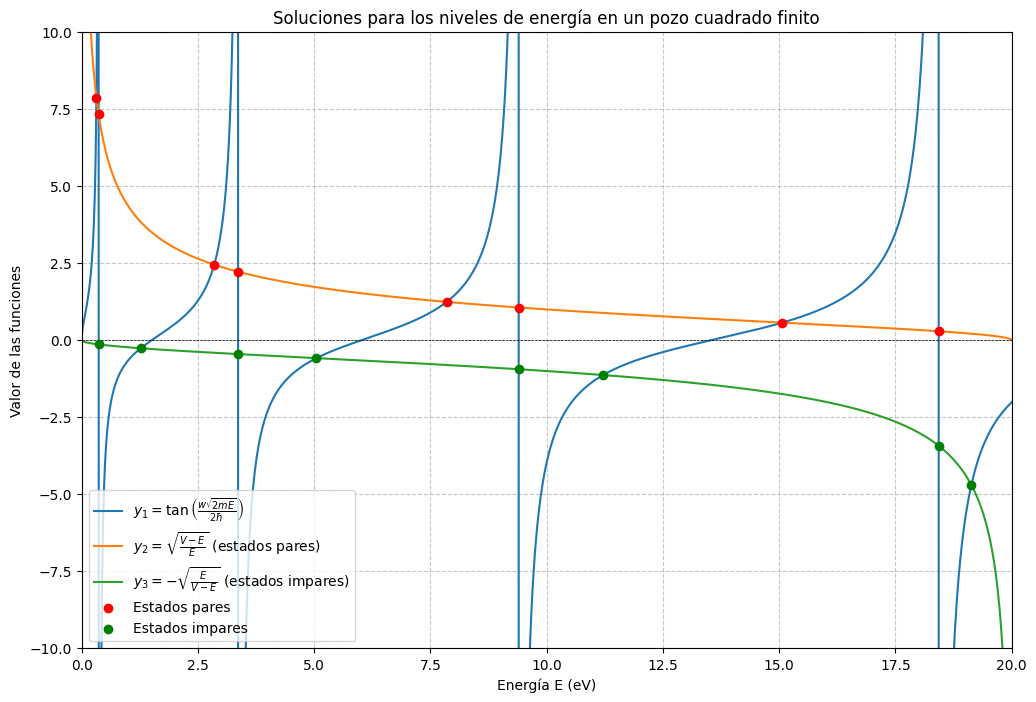

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar, electron_mass, electron_volt

#  físicos
m = 9.11e-31  # masa del electrón (kg)
V = 20 * electron_volt  # altura del pozo (J)
w = 1e-9  # ancho del pozo (m)

# Constantess
hbar_eV = hbar / electron_volt  # ħ en eV·s
m_eV = m / electron_volt  # masa en eV/c² (para simplificar cálculos)

# Rango de energías
E_eV = np.linspace(0.001, 19.999, 1000)  # Evitamos E=0 y E=20
E = E_eV * electron_volt  # Convertimos a julios

# Definimos las funciones y1, y2, y3
def y1(E):
    """Lado izquierdo de la ecuación de autovalores"""
    k = np.sqrt(2*m*E)/hbar
    return np.tan(w*k/2)

def y2(E):
    """Lado derecho para estados pares"""
    return np.sqrt((V - E)/E)

def y3(E):
    """Lado derecho para estados impares"""
    return -np.sqrt(E/(V - E))

# Calculamos los valores
y1_vals = y1(E)
y2_vals = y2(E)
y3_vals = y3(E)

# Graficamos
plt.figure(figsize=(12, 8))
plt.plot(E_eV, y1_vals, label=r'$y_1 = \tan\left(\frac{w\sqrt{2mE}}{2\hbar}\right)$')
plt.plot(E_eV, y2_vals, label=r'$y_2 = \sqrt{\frac{V-E}{E}}$ (estados pares)')
plt.plot(E_eV, y3_vals, label=r'$y_3 = -\sqrt{\frac{E}{V-E}}$ (estados impares)')


plt.ylim(-10, 10)  # Limitamos el rango y para mejor visualización
plt.xlim(0, 20)
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Energía E (eV)')
plt.ylabel('Valor de las funciones')
plt.title('Soluciones para los niveles de energía en un pozo cuadrado finito')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()



# Función para encontrar intersecciones aproximadas
def find_intersections(x, y1, y2):
    """Encuentra intersecciones entre y1 y y2"""
    intersections = []
    for i in range(len(x)-1):
        if (y1[i] - y2[i]) * (y1[i+1] - y2[i+1]) < 0:
            # Interpolación lineal simple para estimar la intersección
            x_intersect = x[i] + (x[i+1] - x[i]) * (y2[i] - y1[i]) / ((y1[i+1] - y1[i]) - (y2[i+1] - y2[i]))
            intersections.append(x_intersect)
    return intersections

# Encontramos intersecciones para estados pares e impares
even_intersections = find_intersections(E_eV, y1_vals, y2_vals)
odd_intersections = find_intersections(E_eV, y1_vals, y3_vals)

# Combinamos y ordenamos todas las intersecciones
all_intersections = sorted(even_intersections + odd_intersections)

# Mostramos los primeros 6 niveles
print("Estimación de los primeros 6 niveles de energía (eV):")
for i, E in enumerate(all_intersections[:6]):
    print(f"Nivel {i}: {E:.3f} eV")

# Marcamos las intersecciones en el gráfico
plt.scatter(even_intersections, [y2(E*electron_volt) for E in even_intersections],
            color='red', zorder=5, label='Estados pares')
plt.scatter(odd_intersections, [y3(E*electron_volt) for E in odd_intersections],
            color='green', zorder=5, label='Estados impares')

plt.legend()
plt.show()

7

La distancia desde el centro de la Tierra al punto L1 es: 326045071.665 m
Que equivale a 84.82% de la distancia Tierra-Luna
O aproximadamente 5.835e+07 m desde la Luna

Resultado con método de la secante implementado manualmente:
Distancia al punto L1: 326040738.846 m

Aproximación teórica: 322876041.500 m
Diferencia con nuestro cálculo: 3169030.166 m


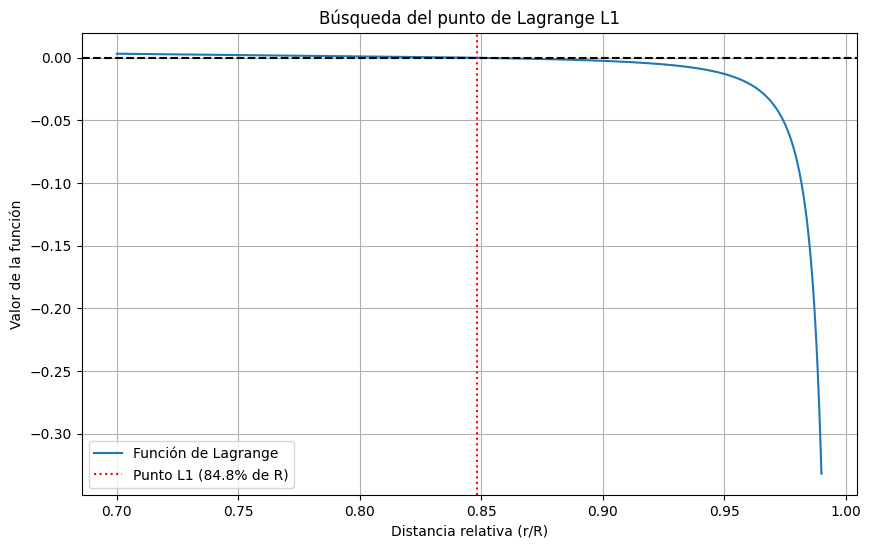

In [15]:
import numpy as np
from scipy.optimize import newton

# Constantes
G = 6.674e-11       # Constante gravitacional (m^3 kg^-1 s^-2)
M = 5.974e24        # Masa de la Tierra (kg)
m = 7.348e22        # Masa de la Luna (kg)
R = 3.844e8         # Distancia Tierra-Luna (m)
ω = 2.662e-6        # Velocidad angular (s^-1)

# definimos la función que describe el equilibrio de fuerzas en L1
def lagrange_equation(r):
    """
    Ecuación que determina la posición del punto L1:
    GM/r² - Gm/(R-r)² - ω²r = 0
    """
    term1 = G * M / (r**2)
    term2 = G * m / ((R - r)**2)
    term3 = ω**2 * r
    return term1 - term2 - term3

# definimos la derivada de la función para el método de Newton
def lagrange_derivative(r):
    """
    Derivada de la ecuación de Lagrange:
    -2GM/r³ - 2Gm/(R-r)³ - ω²
    """
    term1 = -2 * G * M / (r**3)
    term2 = -2 * G * m / ((R - r)**3)
    term3 = -ω**2
    return term1 + term2 + term3

# Estimación inicial: aproximadamente el 90% de la distancia Tierra-Luna
# (sabemos que L1 está cerca de la Luna pero no demasiado)
initial_guess = 0.9 * R

# Resolvemos usando el método de Newton
try:
    r_L1 = newton(lagrange_equation, initial_guess, fprime=lagrange_derivative,
                 tol=1e-6, maxiter=100)
    print(f"La distancia desde el centro de la Tierra al punto L1 es: {r_L1:.3f} m")
    print(f"Que equivale a {r_L1/R*100:.2f}% de la distancia Tierra-Luna")
    print(f"O aproximadamente {R - r_L1:.3e} m desde la Luna")

except RuntimeError:
    print("El método de Newton no convergió. Probando con el método de la secante...")
    # Si falla Newton, probamos con la secante
    r_L1 = newton(lagrange_equation, initial_guess, fprime=None, tol=1e-6, maxiter=100)
    print(f"La distancia desde el centro de la Tierra al punto L1 es: {r_L1:.3f} m")
    print(f"Que equivale a {r_L1/R*100:.2f}% de la distancia Tierra-Luna")
    print(f"O aproximadamente {R - r_L1:.3e} m desde la Luna")

# Verificación adicional: implementación manual del método de la secante
def secant_method(f, x0, x1, tol=1e-6, max_iter=100):
    """Implementación del método de la secante"""
    for i in range(max_iter):
        fx0 = f(x0)
        fx1 = f(x1)
        if abs(fx1) < tol:
            return x1
        x_new = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        x0, x1 = x1, x_new
    return x1

# Usamos dos estimaciones iniciales razonables
r_L1_secant = secant_method(lagrange_equation, 0.8*R, 0.9*R)
print("\nResultado con método de la secante implementado manualmente:")
print(f"Distancia al punto L1: {r_L1_secant:.3f} m")

# Comparación con aproximación conocida (para verificar)
# La aproximación es: r ≈ R - (m/(3M))^(1/3)*R
approx = R - (m/(3*M))**(1/3)*R
print(f"\nAproximación teórica: {approx:.3f} m")
print(f"Diferencia con nuestro cálculo: {abs(r_L1 - approx):.3f} m")

# gráfico de la función para visualizar la solución
import matplotlib.pyplot as plt

r_values = np.linspace(0.7*R, 0.99*R, 1000)
f_values = [lagrange_equation(r) for r in r_values]

plt.figure(figsize=(10, 6))
plt.plot(r_values/R, f_values, label='Función de Lagrange')
plt.axhline(0, color='black', linestyle='--')
plt.axvline(r_L1/R, color='red', linestyle=':', label=f'Punto L1 ({r_L1/R*100:.1f}% de R)')
plt.xlabel('Distancia relativa (r/R)')
plt.ylabel('Valor de la función')
plt.title('Búsqueda del punto de Lagrange L1')
plt.grid(True)
plt.legend()
plt.show()